In [1]:
%reload_ext autoreload
%autoreload 2

import sys

import numpy as np

sys.path.append("..")
from dm21cm.dm_params import DMParams

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file("../matplotlibrc")

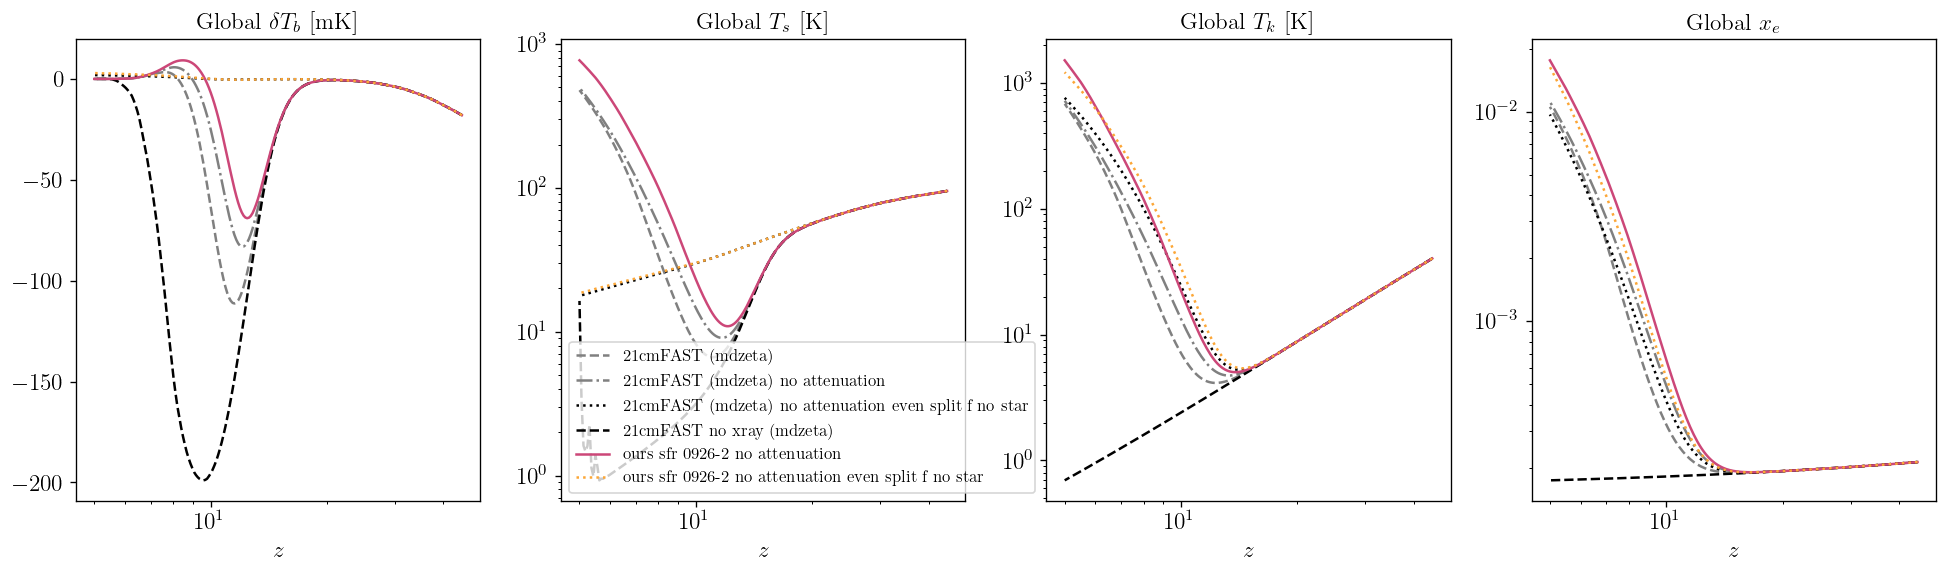

In [34]:
plot_options = {
    #'base' : dict(color='b', ls='-'),
    'base_mdz' : dict(color='gray', ls='--'),
    'base_mdz_noatten' : dict(color='gray', ls='-.'),
    'base_mdz_noatten_esf_nostar' : dict(color='k', ls=':'),
    #'base_mdz_noatten_2' : dict(color='b', ls='-.'),
    #'base_mdz_noatten_halfHe' : dict(color='r', ls='-.'),
    #'base_mdz_noatten_noHe' : dict(color='gray', ls=':'),
    'noxray_mdz' : dict(color='k', ls='--'),
    'ours_sfr0926-2_noatten' : dict(color=cms['plasma'](0.5)),
    'ours_esf_nostar' : dict(color=cms['plasma'](0.8), ls=':'),
    # 'ours_unif' : dict(color=cms['viridis'](0.7), ls=':'),
    # 'test' : dict(color='b', ls=':'),
    # 'test2' : dict(color='r', ls=':'),
    # 'ours_sfr0926-2_noatten_coarsen10' : dict(color=cms['plasma'](0.8)),
    # 'ours_sfr0926-2_noatten_noHe' : dict(color=cms['plasma'](0.8)),
}

labels = {
    'T_b' : {
    },
    'T_k' : {
    },
    'T_s' : {
        'base_mdz' : '21cmFAST (mdzeta)',
        'base_mdz_noatten' : '21cmFAST (mdzeta) no attenuation',
        'base_mdz_noatten_noHe' : '21cmFAST (mdzeta) no attenuation no He',
        'base_mdz_noatten_halfHe' : '21cmFAST (mdzeta) no attenuation 1/2 He',
        'base_mdz_noatten_esf' : '21cmFAST (mdzeta) no attenuation even split f',
        'base_mdz_noatten_esf_nostar' : '21cmFAST (mdzeta) no attenuation even split f no star',
        'noxray_mdz' : '21cmFAST no xray (mdzeta)',
        'ours_sfr0926-2_noatten' : 'ours sfr 0926-2 no attenuation',
        'ours_unif' : 'ours sfr 0926-2 no attenuation uniform',
        'ours_esf' : 'ours sfr 0926-2 no attenuation even split f',
        'ours_esf_nostar' : 'ours sfr 0926-2 no attenuation even split f no star',
        # 'test' : 's8>0 L_X=0 pop2ion=0',
        # 'test2' : 's8>0 L_X=0 pop2ion>0',
        'ours_sfr0926-2_noatten_noHe' : 'ours sfr 0926-2 no attenuation no He',
        'ours_sfr0926-2_noatten_coarsen10' : 'ours sfr 0926-2 no attenuation coarsen=10',
    },
}

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for name in plot_options.keys():
    
    records = np.load(f'../data/run_info/xc_{name}_records.npy', allow_pickle=True).item()
    
    axs[0].plot(records['z'], records['T_b'], label=(labels['T_b'][name] if name in labels['T_b'].keys() else None), **plot_options[name])
    axs[1].plot(records['z'], records['T_s'], label=(labels['T_s'][name] if name in labels['T_s'].keys() else None), **plot_options[name])
    axs[2].plot(records['z'], records['T_k'], label=(labels['T_k'][name] if name in labels['T_k'].keys() else None), **plot_options[name])
    if name not in ['noxray', 'base']:
        axs[3].plot(records['z'], records['x_e'], **plot_options[name])
        #axs[4].plot(records['z'], records['1-x_H'], **plot_options[name])

axs[0].set(title=r'Global $\delta T_b$ [mK]', xlabel=r'$z$')
axs[1].set(title=r'Global $T_s$ [K]', xlabel=r'$z$')
axs[2].set(title=r'Global $T_k$ [K]', xlabel=r'$z$')
axs[3].set(title=r'Global $x_e$', xlabel=r'$z$')
#axs[4].set(title=r'Global $1-x_H$', xlabel=r'$z$')

axs[0].set(xscale='log')
axs[1].set(xscale='log', yscale='log')
axs[2].set(xscale='log', yscale='log')
axs[3].set(xscale='log', yscale='log')
#axs[4].set(xscale='log', yscale='log')

axs[1].legend(fontsize=10)
#fig.savefig('../outputs/plots/global_evolution.pdf')

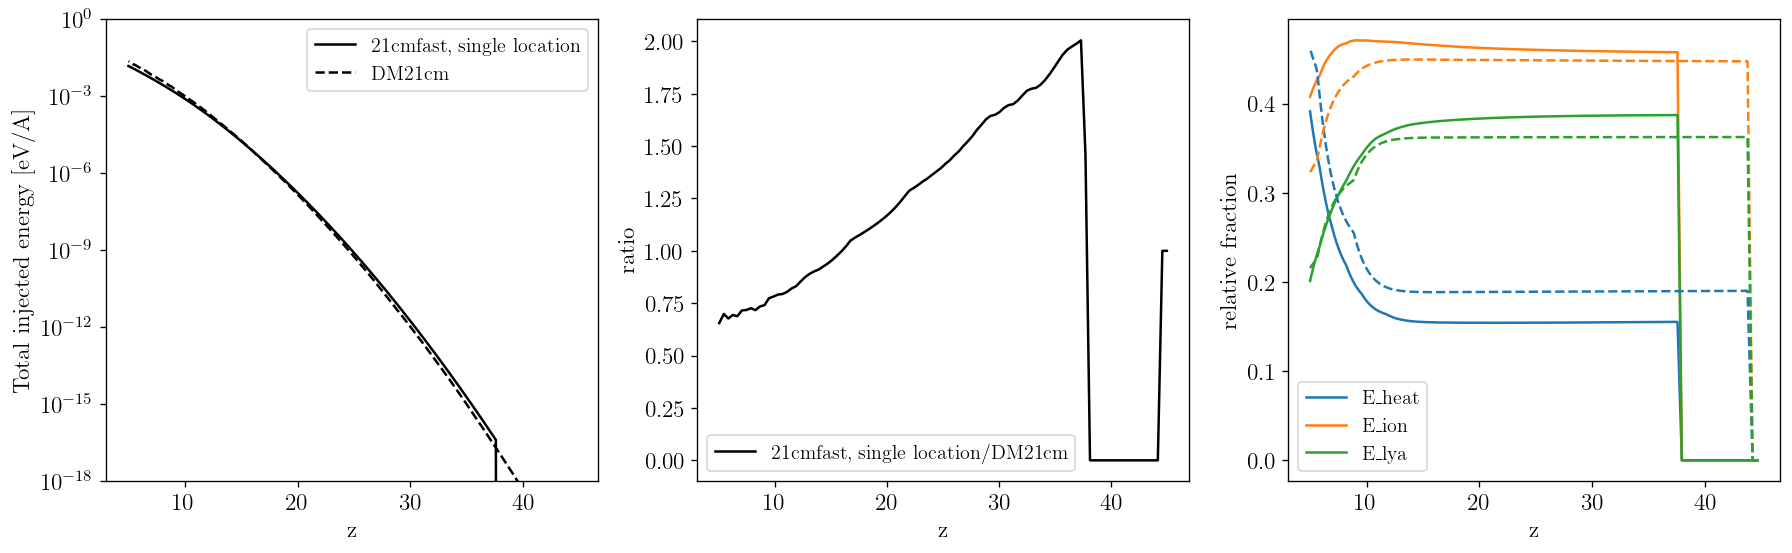

In [36]:
# plot injected energy
E_heat_arr = []
E_ion_arr = []
E_lya_arr = []
z_arr = []
with open('../scripts/x21_esf_nostar.out', 'r') as file:
    for line in file:
        if "E_heat =" in line:
            value = line.split("E_heat =")[1].split("eV/A")[0].strip()
            E_heat_arr.append(float(value))
        if "E_ion =" in line:
            value = line.split("E_ion =")[1].split("eV/A")[0].strip()
            E_ion_arr.append(float(value))
        if "E_lya =" in line:
            value = line.split("E_lya =")[1].strip()
            E_lya_arr.append(float(value))
        if "DEBUG:  zp =" in line:
            value = float(line.split("TsBox.c DEBUG:  zp =")[1].strip())
            z_arr.append(value)
E_heat_arr = np.array(E_heat_arr)
E_ion_arr = np.array(E_ion_arr)
E_lya_arr = np.array(E_lya_arr)
z_arr = np.array(z_arr)
E_tot_arr = np.clip(E_heat_arr + E_ion_arr + E_lya_arr, 1e-100, None)

# ours
records = np.load(f'../data/run_info/xc_ours_esf_nostar_records.npy', allow_pickle=True).item()
Edh_heat_arr = records['dep_heat']
Edh_ion_arr = records['dep_ion']
Edh_lya_arr = records['dep_exc']
zdh_arr = records['z']
Edh_tot_arr = np.clip(Edh_heat_arr + Edh_ion_arr + Edh_lya_arr, 1e-100, None)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

ax = axs[0]
ax.plot(z_arr, E_tot_arr, color='k', label='21cmfast, single location')
ax.plot(zdh_arr, Edh_tot_arr, color='k', label='DM21cm', ls='--')
ax.set(ylim=(1e-18, 1))
ax.set(yscale='log', xlabel='z', ylabel='Total injected energy [eV/A]')
ax.legend()

ax = axs[1]
z_common_arr = np.linspace(5, 45, 100)
E_tot_interp = np.interp(z_common_arr, z_arr[::-1], E_tot_arr[::-1], left=1e-100, right=1e-100)
Edh_tot_interp = np.interp(z_common_arr, zdh_arr[::-1], Edh_tot_arr[::-1], left=1e-100, right=1e-100)
ax.plot(z_common_arr, E_tot_interp/Edh_tot_interp, color='k', label='21cmfast, single location/DM21cm')
ax.set(xlabel='z', ylabel='ratio')
ax.legend()

ax = axs[2]
ax.plot(z_arr, E_heat_arr / E_tot_arr, color='C0', label='E_heat')
ax.plot(z_arr, E_ion_arr / E_tot_arr, color='C1', label='E_ion')
ax.plot(z_arr, E_lya_arr / E_tot_arr, color='C2', label='E_lya')
ax.plot(zdh_arr, Edh_heat_arr / Edh_tot_arr, color='C0', ls='--')
ax.plot(zdh_arr, Edh_ion_arr / Edh_tot_arr, color='C1', ls='--')
ax.plot(zdh_arr, Edh_lya_arr / Edh_tot_arr, color='C2', ls='--')
ax.set(xlabel='z', ylabel='relative fraction')
ax.legend();

In [7]:
name = 'ours_nobath'
records = np.load(f'../data/run_info/xc_{name}_records.npy', allow_pickle=True).item()

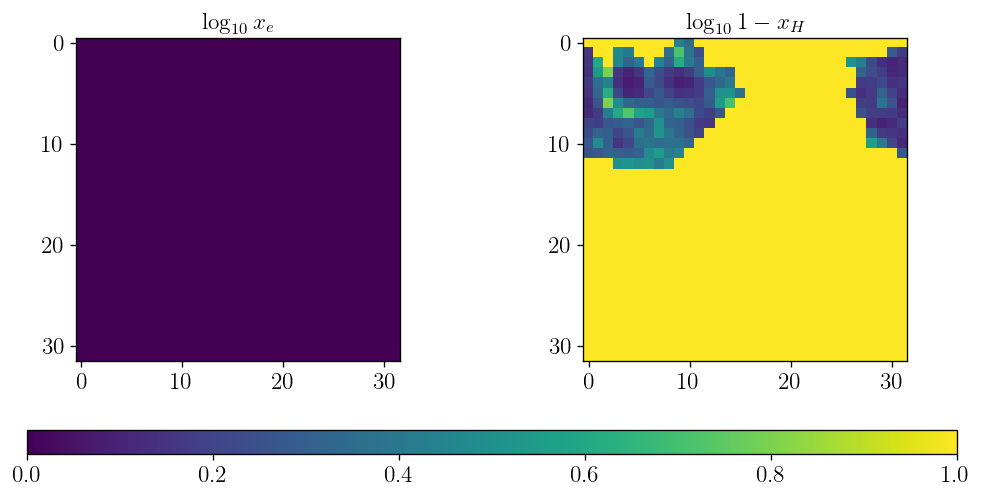

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
xe_slice = records['x_e_slice'][-30]
xH_slice = records['x_H_slice'][-30]
im = axs[0].imshow(xe_slice, vmin=0, vmax=1)
axs[1].imshow(1-xH_slice, vmin=0, vmax=1)
# r = np.log10(1-xH_slice) - np.log10(xe_slice)
# axs[2].imshow(np.where(xH_slice>0, r, np.nan))

axs[0].set(title=r'$\log_{10} x_e$')
axs[1].set(title=r'$\log_{10} 1-x_H$')

fig.colorbar(im, ax=axs, orientation='horizontal', aspect=40)
# axs[2].set(title=r'$\log_{10} (1-x_H) - \log_{10} x_e$')

/tmp/ipykernel_2395305/1397886710.py:5: RuntimeWarning: divide by zero encountered in log10
  im1 = axs[1].imshow(np.log10(xH_slice))
/tmp/ipykernel_2395305/1397886710.py:6: RuntimeWarning: divide by zero encountered in log10
  im2 = axs[2].imshow(np.where(xH_slice>0, np.log10(xH_slice) - np.log10(xe_slice), np.nan))


[Text(0.5, 1.0, '$\\log_{10} x_H - \\log_{10} x_e$')]

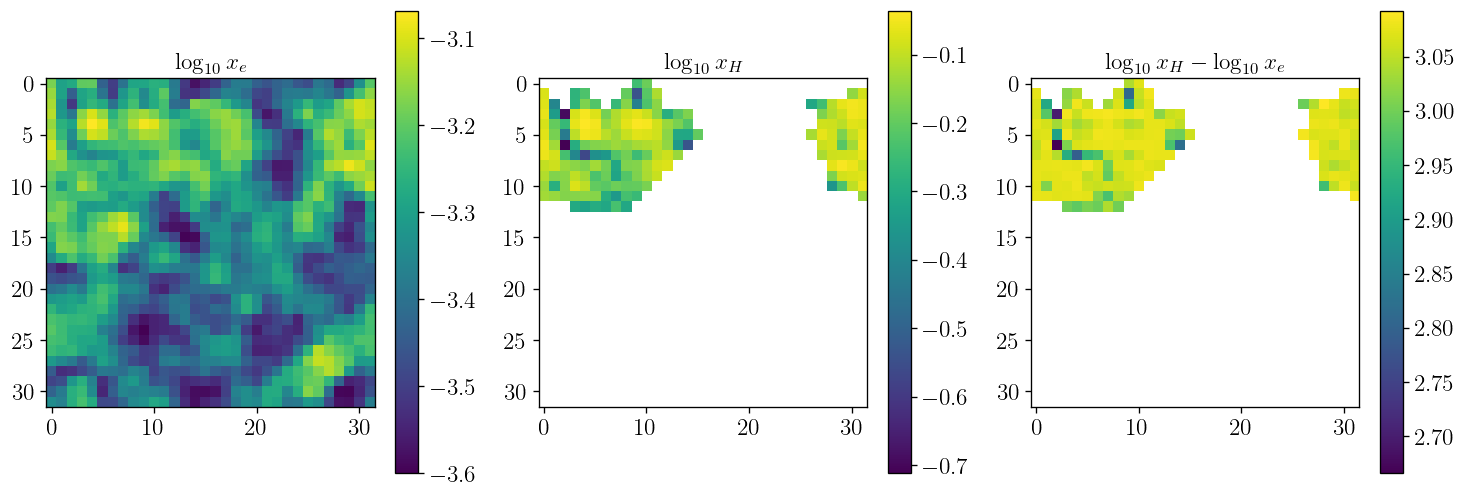

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
xe_slice = records['x_e_slice'][-30]
xH_slice = records['x_H_slice'][-30]
im0 = axs[0].imshow(np.log10(xe_slice))
im1 = axs[1].imshow(np.log10(xH_slice))
im2 = axs[2].imshow(np.where(xH_slice>0, np.log10(xH_slice) - np.log10(xe_slice), np.nan))
fig.colorbar(im0, ax=axs[0])
fig.colorbar(im1, ax=axs[1])
fig.colorbar(im2, ax=axs[2])

axs[0].set(title=r'$\log_{10} x_e$')
axs[1].set(title=r'$\log_{10} x_H$')
axs[2].set(title=r'$\log_{10} x_H - \log_{10} x_e$')